In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Reading dataset

In [2]:
data = pd.read_csv('/home/silva/Downloads/breast-cancer.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Data Verification

In [3]:
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = data.copy()
df = data.drop('Unnamed: 32',axis = 1 )
df = df.drop('id',axis = 1 )
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

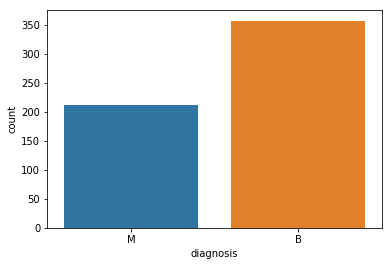

In [9]:
sns.countplot(df['diagnosis'],label="Count") 

## Doing data balancing

In [10]:
#Counting registry number of each class 
b_count, m_count = df['diagnosis'].value_counts()

#Splitting by class
df_b = df[df['diagnosis'] == 'B']
df_m = df[df['diagnosis'] == 'M']

#Cutting dataset for "under-sampling"
df_b = df_b.sample(m_count)

#Re-join
df_manipulated = pd.concat([df_b, df_m], axis=0)

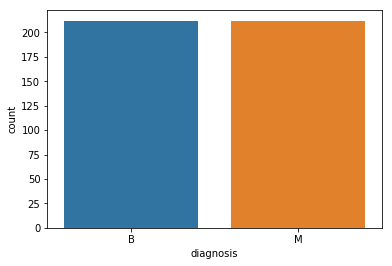

In [11]:
sns.countplot(df_manipulated['diagnosis'],label="Count") 

## Exploring Data

### Standardizing to Plot

In [12]:
def standardized(df_features):
    df_standardized = (df_features - df_features.mean()) / (df_features.std()) 
    return df_standardized

def plot_boxplot(df_class, df_features_standardized):
    df_standardized = pd.concat([df_class,df_features_standardized],axis=1)
    df_melted = pd.melt(df_standardized,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=(60,8))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df_melted)

In [13]:
df_class = df_manipulated.diagnosis 
df_features = df_manipulated.drop('diagnosis', axis=1)
df_standardized = standardized(df_features)

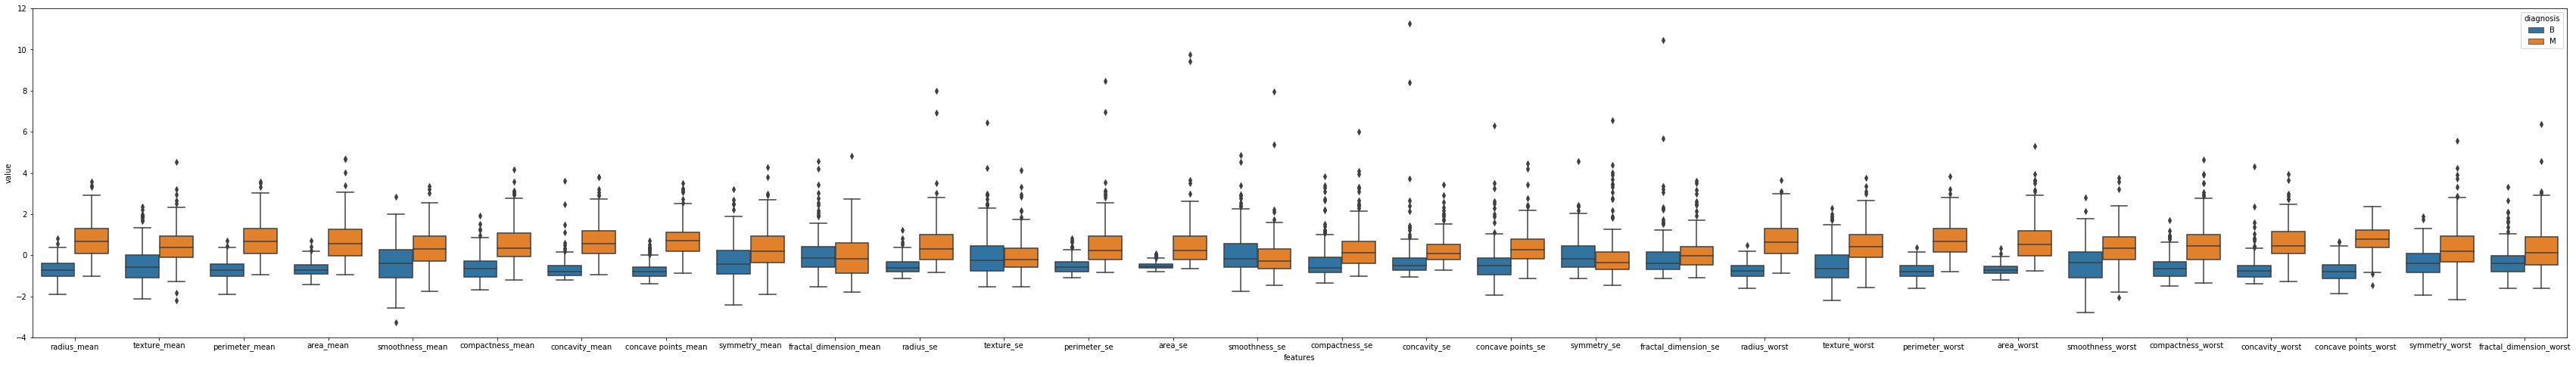

In [14]:
plot_boxplot(df_class, df_standardized)

In [15]:
columns_without_variation = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']
columns_without_variation

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

In [16]:
df_manipulated = df_manipulated.drop(columns=columns_without_variation)
df_manipulated.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
456,B,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220
395,B,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,...,14.92,25.34,96.42,684.5,0.1066,0.1231,0.0846,0.07911,0.2523,0.06609


In [17]:
corr = df_manipulated.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.316839,0.997786,0.988059,0.181290,0.509005,0.676173,0.825769,0.145853,0.686609,...,0.966608,0.284012,0.962948,0.939548,0.105522,0.390364,0.513102,0.736105,0.121105,-0.010800
texture_mean,0.316839,1.000000,0.323843,0.314329,-0.014907,0.247646,0.307777,0.291723,0.072863,0.256441,...,0.347966,0.911137,0.356952,0.338836,0.094331,0.300170,0.325100,0.298551,0.092846,0.139318
perimeter_mean,0.997786,0.323843,1.000000,0.986568,0.220645,0.560316,0.715625,0.854088,0.184415,0.697361,...,0.966014,0.291532,0.967919,0.938898,0.138219,0.433281,0.550851,0.763294,0.148759,0.032977
area_mean,0.988059,0.314329,0.986568,1.000000,0.179354,0.492435,0.679518,0.820385,0.139666,0.736684,...,0.958464,0.272931,0.955041,0.955175,0.100053,0.359981,0.493339,0.708213,0.094922,-0.022840
smoothness_mean,0.181290,-0.014907,0.220645,0.179354,1.000000,0.683493,0.575212,0.572226,0.565266,0.291620,...,0.219446,0.054904,0.247870,0.204099,0.800929,0.515622,0.502107,0.540105,0.405364,0.527829
compactness_mean,0.509005,0.247646,0.560316,0.492435,0.683493,1.000000,0.882539,0.828215,0.643091,0.470772,...,0.533014,0.266730,0.589156,0.498599,0.573595,0.867285,0.826013,0.818910,0.532777,0.676621
concavity_mean,0.676173,0.307777,0.715625,0.679518,0.575212,0.882539,1.000000,0.923711,0.532204,0.620250,...,0.681095,0.304734,0.722506,0.663091,0.461947,0.734289,0.880056,0.857523,0.404963,0.494779
concave points_mean,0.825769,0.291723,0.854088,0.820385,0.572226,0.828215,0.923711,1.000000,0.475312,0.685209,...,0.827409,0.291037,0.853427,0.800794,0.442005,0.649608,0.751864,0.906844,0.355480,0.347368
symmetry_mean,0.145853,0.072863,0.184415,0.139666,0.565266,0.643091,0.532204,0.475312,1.000000,0.275279,...,0.176423,0.089101,0.214301,0.159113,0.412013,0.506959,0.469542,0.451638,0.696417,0.458234
radius_se,0.686609,0.256441,0.697361,0.736684,0.291620,0.470772,0.620250,0.685209,0.275279,1.000000,...,0.716300,0.169159,0.720518,0.750194,0.109423,0.251854,0.363989,0.515724,0.045185,0.005951


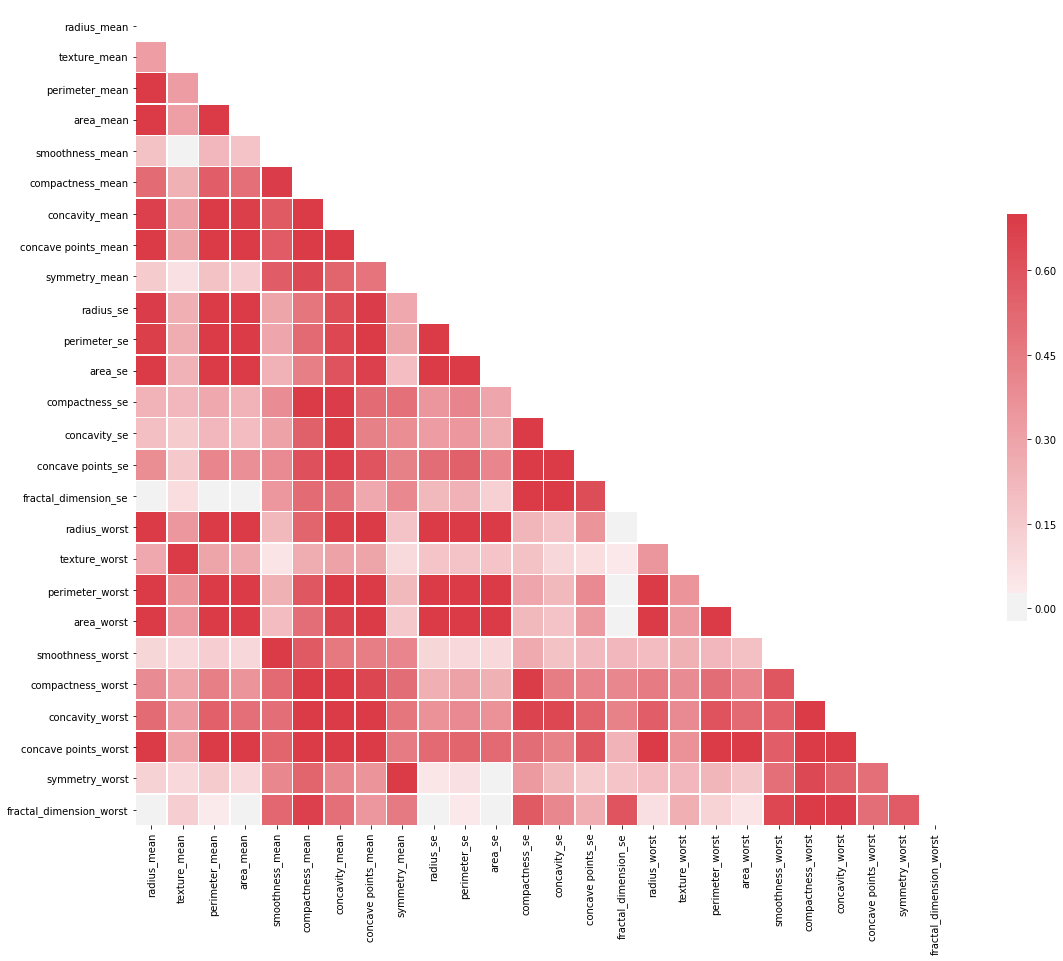

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### First filtering on dataset

In [48]:
high_correlated_columns = ["radius_se", "perimeter_se", "area_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se"]
x = df.drop(high_correlated_columns, axis=1)
x.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [49]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=101)

### Decision tree for feature selection

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz 
from sklearn.metrics import confusion_matrix

In [81]:
dtc_ent = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2)
dtc_ent = dtc_ent.fit(x_train, y_train)
dtc_ent.score(x_test, y_test)

0.895

#### Confusion matrix

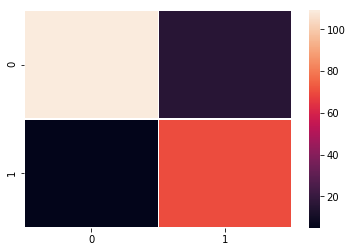

In [82]:
cm = confusion_matrix(y_test, dtc_ent.predict(x_test))
sns.heatmap(cm, linewidths=.2)

In [83]:
cm

array([[109,  16],
       [  5,  70]])

#### Visualizing

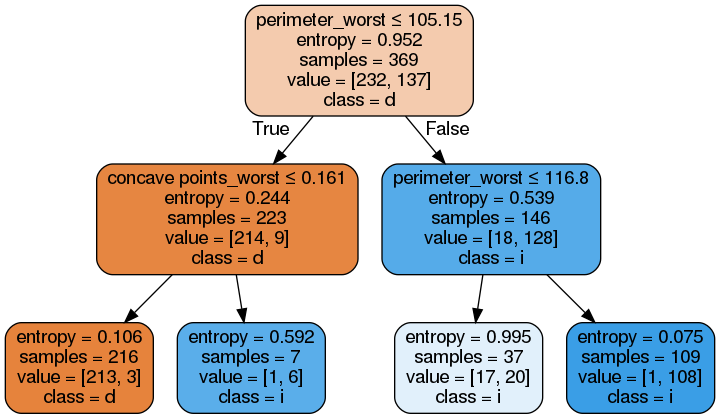

In [84]:
dot_data = StringIO()
tree.export_graphviz(dtc_ent, 
                out_file=dot_data,  
                feature_names=list(x.columns.values),
                class_names= 'diagnosis',
                filled=True, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [90]:
df_for_threatment = df_manipulated[['perimeter_worst','concave points_worst', 'diagnosis']]
